In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os 
import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
#read data from CSV files
FPT_FILEPATH = 'FPT.csv'
MSN_FILEPATH = 'MSN.csv'
VIC_FILEPATH = 'VIC.csv'
PNJ_FILEPATH = 'PNJ.csv'

fpt_data = pd.read_csv(FPT_FILEPATH,index_col='Date/Time', parse_dates=['Date/Time'])
msn_data = pd.read_csv(MSN_FILEPATH,index_col='Date/Time', parse_dates=['Date/Time'])
pnj_data = pd.read_csv(PNJ_FILEPATH,index_col='Date/Time', parse_dates=['Date/Time'])
vic_data = pd.read_csv(VIC_FILEPATH,index_col='Date/Time', parse_dates=['Date/Time'])

In [3]:
fpt_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97406 entries, 2018-12-25 09:15:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         97406 non-null  object 
 1   Open           97406 non-null  float64
 2   High           97406 non-null  float64
 3   Low            97406 non-null  float64
 4   Close          97406 non-null  float64
 5   Volume         97406 non-null  int64  
 6   Open Interest  97406 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 5.9+ MB


In [4]:
msn_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135354 entries, 2017-12-25 09:15:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Open           135354 non-null  float64
 2   High           135354 non-null  float64
 3   Low            135354 non-null  float64
 4   Close          135354 non-null  float64
 5   Volume         135354 non-null  int64  
 6   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ MB


In [5]:
pnj_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125309 entries, 2018-02-28 09:15:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         125309 non-null  object 
 1   Open           125309 non-null  float64
 2   High           125309 non-null  float64
 3   Low            125309 non-null  float64
 4   Close          125309 non-null  float64
 5   Volume         125309 non-null  int64  
 6   Open Interest  125309 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 7.6+ MB


In [6]:
vic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 101266 entries, 2018-10-17 09:39:00 to 2020-12-22 14:46:00
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Open           101266 non-null  float64
 2   High           101266 non-null  float64
 3   Low            101266 non-null  float64
 4   Close          101266 non-null  float64
 5   Volume         101266 non-null  int64  
 6   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 6.2+ MB


In [7]:
#because all values from Open Interest is 0, we will remove this column from our dataset
fpt_data = fpt_data.drop(['Open Interest'], axis=1)
msn_data = msn_data.drop(['Open Interest'], axis=1)
vic_data = vic_data.drop(['Open Interest'], axis=1)
pnj_data = pnj_data.drop(['Open Interest'], axis=1)

fpt_data = fpt_data.drop(['Ticker'], axis=1)
msn_data = msn_data.drop(['Ticker'], axis=1)
vic_data = vic_data.drop(['Ticker'], axis=1)
pnj_data = pnj_data.drop(['Ticker'], axis=1)

fpt_data['Volume'] = fpt_data['Volume'].astype('float')
msn_data['Volume'] = msn_data['Volume'].astype('float')
vic_data['Volume'] = vic_data['Volume'].astype('float')
pnj_data['Volume'] = pnj_data['Volume'].astype('float')


In [8]:
fpt_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97406 entries, 2018-12-25 09:15:00 to 2020-12-22 14:46:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    97406 non-null  float64
 1   High    97406 non-null  float64
 2   Low     97406 non-null  float64
 3   Close   97406 non-null  float64
 4   Volume  97406 non-null  float64
dtypes: float64(5)
memory usage: 4.5 MB


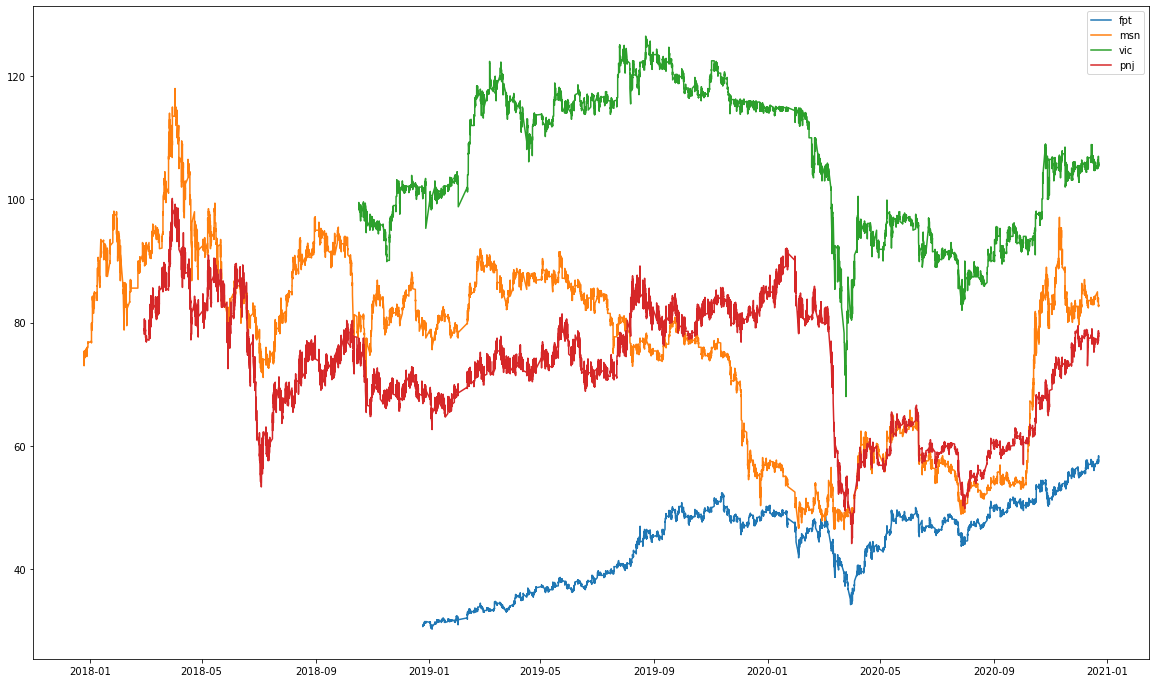

In [9]:
plt.figure(figsize=(20,12))
plt.plot(fpt_data['Close'])
plt.plot(msn_data['Close'])
plt.plot(vic_data['Close'])
plt.plot(pnj_data['Close'])
plt.legend(['fpt','msn','vic','pnj'])
plt.show()


# Because all data started from 2019 then we will discard all data before that for cohesiveness and consistancy.

# Next steps: 
- Fill in data for all missing minutes with interpolate(linear)
- Rescale data. (opt)
- Split the data 
- Data windowing
- Create Baseline Model


# Fill in data for missing minutes.
Our time period starts from 2019-01-02 09:15:00

In [10]:
DATE_START = '2019-01-02 09:15:00'
DATE_END = '2020-12-22 14:46:00'

fpt_data = fpt_data.loc[DATE_START:DATE_END,:]
vic_data = vic_data.loc[DATE_START:DATE_END,:]
msn_data = msn_data.loc[DATE_START:DATE_END,:]
pnj_data = pnj_data.loc[DATE_START:DATE_END,:]

data_dict = {
    'fpt': fpt_data,
    'msn': msn_data,
    'pnj': pnj_data,
    'vic': vic_data
}
for i in data_dict:
    print (data_dict[i].shape)

(97017, 5)
(92287, 5)
(89497, 5)
(92017, 5)


Even though we set out Start and End period, our data still have missing values. Now we create a dataframe with index as datetime with incremental time of 1 minute.

all_datasets have the same number of days.
generate the unique time frame for the unique days of fpt_data

In [11]:
number_of_days = len(np.unique(fpt_data.index.date))
afternoon_end = datetime.datetime(year = 2000,month = 1, day =1,hour = 14, minute=46) 
afternoon_start = datetime.datetime(year = 2000,month = 1, day =1,hour = 13, minute=00) 
day_end = datetime.datetime(year = 2000,month = 1, day =1,hour = 11, minute=30) 
day_start = datetime.datetime(year = 2000, month = 1, day =1, hour = 9, minute=15)

time_period = (day_end - day_start).total_seconds() + (afternoon_end - afternoon_start).total_seconds()
time_period_per_day = time_period/60
total_minute = time_period_per_day*number_of_days

for i in data_dict:
    print('Rate of filled values in dataset',i,':', data_dict[i].shape[0]/total_minute)

Rate of filled values in dataset fpt : 0.8132528605557651
Rate of filled values in dataset msn : 0.7736032524414267
Rate of filled values in dataset pnj : 0.7502158514606647
Rate of filled values in dataset vic : 0.7713399555723207


# Split the data

In [12]:
def split_data(df,train_rate, val_rate):
    length = df.shape[0]
    train_df = df[0:int(length*train_rate)]
    val_df = df[int(length*train_rate):int(length*(val_rate+train_rate))]
    test_df = df[int(length*(val_rate+train_rate)):]
    return train_df,val_df,test_df
train_fpt,val_fpt,test_fpt = split_data(fpt_data,0.7,0.2)
print(train_fpt.shape)
print(val_fpt.shape)
print(test_fpt.shape)

(67911, 5)
(19404, 5)
(9702, 5)


# Data Windowing

In [13]:
def window_dataset(data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=False, expand_dims=False):
    window = n_steps + n_horizon
    
    if expand_dims:
        ds = tf.expand_dims(data, axis=-1)
        ds = tf.data.Dataset.from_tensor_slices(ds)
        print(ds)
    else:
        ds = tf.data.Dataset.from_tensor_slices(data)
        print(ds)
    ds = ds.window(window, shift=n_horizon, drop_remainder=True)
    
    ds = ds.flat_map(lambda x : x.batch(window))
    
    if multi_var:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:, 3]))
    else:
        ds = ds.map(lambda x : (x[:-n_horizon], x[-n_horizon:]))
    
    ds = ds.batch(batch_size).prefetch(1)
    
    return ds

tf.random.set_seed(42)

n_steps = 72
n_horizon = 1
batch_size = 1
shuffle_buffer = 100


ds = window_dataset(vic_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=True)

print('Example sample shapes')
for idx,(x,y) in enumerate(ds):
    print("x = ", x.numpy().shape)
    print("y = ", y.numpy().shape)
    break

<TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.float64, name=None)>
Example sample shapes
x =  (1, 72, 5)
y =  (1, 1)


In [14]:
def build_dataset(data,
                  train_rate=0.7,
                  val_rate = 0.9, 
                  n_steps=24*30, 
                  n_horizon=24, 
                  batch_size=256, 
                  expand_dims=False, 
                  multi_var=False
                  ):
    """If multi variate then first column is always the column from which the target is contstructed.
    """
    
    tf.random.set_seed(23)
    
    
    
    train_data, val_data, test_data = split_data(data, train_rate=train_rate, val_rate=val_rate)

    if multi_var:
        train_mean = train_data.mean()
        train_std = train_data.std()

        train_data = (train_data - train_mean) / train_std
        val_data = (val_data - train_mean) / train_std
        test_data = (test_data - train_mean) / train_std
    
    train_ds = window_dataset(train_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    val_ds = window_dataset(val_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    test_ds = window_dataset(test_data, n_steps, n_horizon, batch_size, shuffle_buffer, multi_var=multi_var, expand_dims=expand_dims)
    
    print(f"Prediction lookback (n_steps): {n_steps}")
    print(f"Prediction horizon (n_horizon): {n_horizon}")
    print(f"Batch Size: {batch_size}")
    print("Datasets:")
    print(train_ds.element_spec)
    
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = build_dataset(vic_data,multi_var=True)

<TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.float64, name=None)>
<TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.float64, name=None)>
<TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.float64, name=None)>
Prediction lookback (n_steps): 720
Prediction horizon (n_horizon): 24
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, None), dtype=tf.float64, name=None))


In [15]:
train_ds.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, None), dtype=tf.float64, name=None))>

# Model Configuration

In [16]:
def get_params(multivar=True):
    lr = 3e-5
    n_steps=24
    n_horizon=24
    if multivar:
        n_features=5
    else:
        n_features=1
        
    return n_steps, n_horizon, n_features, lr

model_configs = dict()

def cfg_model_run(model, history, test_ds):
    return {"model": model, "history" : history, "test_ds": test_ds}


def run_model(model_name, model_func, model_configs, epochs,fpt_data,pnj_data,msn_data,vic_data):
    
    n_steps, n_horizon, n_features, lr = get_params(multivar=True)
    train_vic, val_vic, test_vic = build_dataset(data=vic_data,n_steps=n_steps, n_horizon=n_horizon, multi_var=True)
    train_fpt, val_fpt, test_fpt = build_dataset(data=fpt_data,n_steps=n_steps, n_horizon=n_horizon, multi_var=True)
    train_msn, val_msn, test_msn = build_dataset(data=msn_data,n_steps=n_steps, n_horizon=n_horizon, multi_var=True)
    train_pnj, val_pnj, test_pnj = build_dataset(data=pnj_data,n_steps=n_steps, n_horizon=n_horizon, multi_var=True)
    # train_ds, val_ds, test_ds = build_dataset(data=data,n_steps=n_steps, n_horizon=n_horizon, multi_var=True)

    model = model_func(n_steps, n_horizon, n_features, lr=lr)

    model_hist = model.fit(train_fpt, validation_data=val_fpt, epochs=epochs)
    model_hist = model.fit(train_msn, validation_data=val_msn, epochs=epochs)
    model_hist = model.fit(train_vic, validation_data=val_vic, epochs=epochs)
    model_hist = model.fit(train_pnj, validation_data=val_pnj, epochs=epochs)

    return model,model_hist

In [17]:
def lstm_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(72, activation='relu', input_shape=(n_steps, n_features), return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name='lstm')
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm = lstm_model(*get_params(multivar=True))
lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 72)            22464     
                                                                 
 lstm_1 (LSTM)               (None, 48)                23232     
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 128)               6272      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 24)                3096   

c:\Users\ADMIN\anaconda3\envs\dscience\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
def lstm_cnn_model(n_steps, n_horizon, n_features, lr):
    
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=6, activation='relu', input_shape=(n_steps,n_features)),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.LSTM(72, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(48, activation='relu', return_sequences=False),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(n_horizon)
    ], name="lstm_cnn")
    
    loss = tf.keras.losses.Huber()
    optimizer = tf.keras.optimizers.Adam(lr=lr)
    
    model.compile(loss=loss, optimizer='adam', metrics=['mae'])
    
    return model

lstm_cnn = lstm_cnn_model(*get_params(multivar=True))
lstm_cnn.summary()

Model: "lstm_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 64)            1984      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 64)             12352     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 3, 72)             39456     
                                                                 
 lstm_1 (LSTM)               (None, 48)                232

In [19]:
# lstm_model, hist = run_model("lstm", lstm_model, model_configs, epochs=19,data=vic_data)
run_model("lstm", lstm_model, model_configs, epochs=50,fpt_data=fpt_data,msn_data=msn_data,vic_data=vic_data,pnj_data=pnj_data)

<TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.float64, name=None)>
<TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.float64, name=None)>
<TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.float64, name=None)>
Prediction lookback (n_steps): 24
Prediction horizon (n_horizon): 24
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, None), dtype=tf.float64, name=None))
<TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.float64, name=None)>
<TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.float64, name=None)>
<TensorSliceDataset element_spec=TensorSpec(shape=(5,), dtype=tf.float64, name=None)>
Prediction lookback (n_steps): 24
Prediction horizon (n_horizon): 24
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, None), dtype=tf.float64, name=None))
<TensorSliceDataset element_spec=TensorSpe

c:\Users\ADMIN\anaconda3\envs\dscience\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


12/12 [==============================] - 4s 193ms/step - loss: 0.4498 - mae: 0.8750 - val_loss: 0.8360 - val_mae: 1.3132
Epoch 2/50
12/12 [==============================] - 1s 49ms/step - loss: 0.3865 - mae: 0.7839 - val_loss: 0.7579 - val_mae: 1.2308
Epoch 3/50
12/12 [==============================] - 1s 49ms/step - loss: 0.3350 - mae: 0.7363 - val_loss: 1.5601 - val_mae: 1.9493
Epoch 4/50
12/12 [==============================] - 1s 50ms/step - loss: 0.3976 - mae: 0.7350 - val_loss: 0.3315 - val_mae: 0.7345
Epoch 5/50
12/12 [==============================] - 1s 53ms/step - loss: 0.2735 - mae: 0.6184 - val_loss: 0.4749 - val_mae: 0.9302
Epoch 6/50
12/12 [==============================] - 1s 50ms/step - loss: 0.2362 - mae: 0.6049 - val_loss: 0.3823 - val_mae: 0.8230
Epoch 7/50
12/12 [==============================] - 1s 50ms/step - loss: 0.1616 - mae: 0.4747 - val_loss: 0.1302 - val_mae: 0.4447
Epoch 8/50
12/12 [==============================] - 1s 51ms/step - loss: 0.0755 - mae: 0.2906

(<keras.engine.sequential.Sequential at 0x1781a782d70>,
 <keras.callbacks.History at 0x1781a76a0b0>)